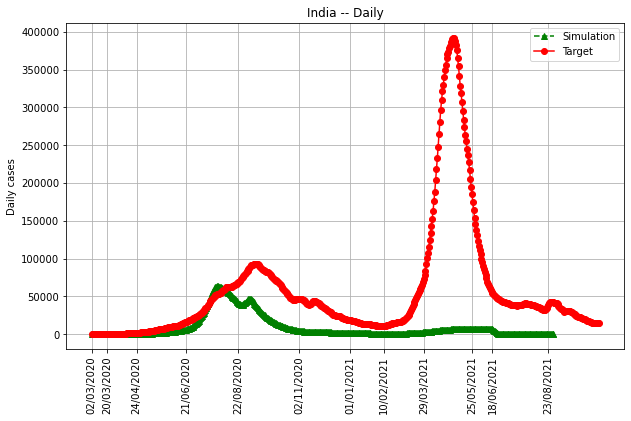

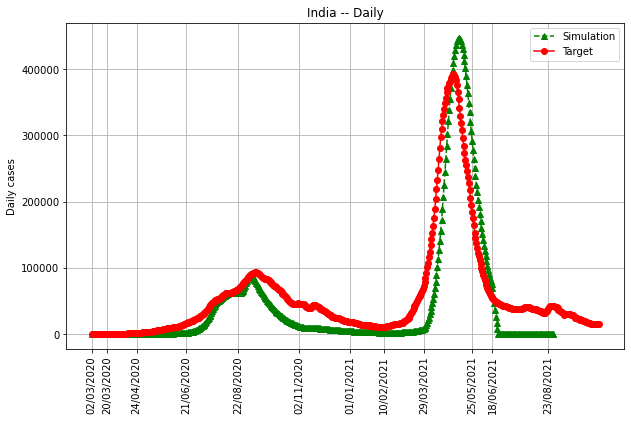

In [1]:
'''
This script compares the SUTRA model with and without restart at the beginning of the second wave.
'''

import pandas as pd
import numpy as np
from datetime import datetime, date
import datetime
from matplotlib import pyplot as plt 

from sutra import run_sutra_model_smooth_transitions_restarts, create_plots

gamma = 0.1
p0 = 1350000000

# restart issue -- without restart

from sutra import run_sutra_model_smooth_transitions, run_sutra_model
phase_starts = [date(2020,3,2), date(2020,3,20), date(2020,4,24), date(2020,6,21),date(2020,8,22),  date(2020,11,2), date(2021,1,1), date(2021,2,10), date(2021,3,29), date(2021,5,25), date(2021,6,18), date(2021,8,23)]
drift_periods = np.array([5, 0, 5, 30, 10,10,10,40,26,3,42])
betas = np.array([0.33, 0.26, 0.16, 0.16, 0.15, 0.21, 0.22, 0.38, 0.28, 0.28, 0.5])
rhos = np.array([0.00001, 0.1, 4.0, 20, 40.3, 39.5, 39.7, 48.3, 85.3, 87.3, 95.1])/100

NT, T, RT = run_sutra_model_smooth_transitions(phase_starts, drift_periods, betas, rhos, p0, gamma)
create_plots(phase_starts, date(2020,3,2), NT, 600)

# with restart
restart_indices = np.array([8,12])
NT, T, RT = run_sutra_model_smooth_transitions_restarts(phase_starts, drift_periods, restart_indices, betas, rhos, p0, gamma)
create_plots(phase_starts, date(2020,3,2), NT, 600)